In [1]:
#1. Importing Libraries
import pandas as pd

In [2]:
#2. Loading the datasets
df_fake = pd.read_csv('../data/Fake.csv')
df_real = pd.read_csv('../data/True.csv')

In [3]:
#Displaying news samples list
print("Fake news samples: ", df_fake.shape)
print("Real news samples: ", df_real.shape)

Fake news samples:  (23481, 4)
Real news samples:  (21417, 4)


In [4]:
#3. Adding Labels
df_fake['label'] = 0  # 0 = Fake
df_real['label'] = 1 # 1 = Real

In [5]:
#4. Combining the datasets
df = pd.concat([df_fake, df_real], axis=0).reset_index(drop=True)

In [6]:
#5. Shuffling the Rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
#6. Basic previewd of the dataset(combined)
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [8]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [9]:
#7. Saving the Combined Final Dataset
df.to_csv('../data/combined_news.csv', index=False)

In [10]:
#Importing NLTK
import nltk

In [11]:
# Downloading the requirements
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gouri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gouri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gouri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Downloading necessary requirements for text-processing
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
# Setting up of English Stopwords
stop_words = set(stopwords.words('english'))

In [14]:
# Function for cleaning each Article text
def clean_text(text):
    #1. Lowercase
    text = text.lower()

    #2. Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    #3. Tokenizing
    tokens = word_tokenize(text)

    #4. Removing stopwords & non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    #5. Joining back to string
    return ' '.join(filtered_tokens)

In [15]:
#Applying Cleaning to 'text' column
df = pd.read_csv('../data/combined_news.csv')  #Loading dataset if not loaded
df['clean_text'] = df['text'].apply(clean_text)

In [16]:
#seeing preview and saving
print(df[['text', 'clean_text']].head())

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                          clean_text  
0  century wire says ben stein reputable professo...  
1  washington reuters us president donald trump r...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrassed country accide...  
4  glasgow scotland reuters us presidential candi...  


In [17]:
df.to_csv('../data/cleaned_news.csv', index=False)

In [18]:
# Vectorization and Splitting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [19]:
#1. Load dataset(Cleaned)
df = pd.read_csv('../data/cleaned_news.csv')

In [20]:
df = df.dropna(subset=['clean_text'])
df['clean_text'] = df['clean_text'].astype(str)

In [21]:
#2. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # limiting vocab size to 5000
X = tfidf.fit_transform(df['clean_text'])   # X is a sparse matrix
y = df['label']

In [22]:
#Saving the vectorizer
joblib.dump(tfidf, '../app/tfidf.pkl')

['../app/tfidf.pkl']

In [23]:
#3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
#Confirming the shapes
print("Train shape: ", X_train.shape)

Train shape:  (35355, 5000)


In [25]:
print("Test shape: ", y_test.shape)

Test shape:  (8839,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

In [27]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [29]:
print("Logistic Regression Accuracy: ",acc_lr)

Logistic Regression Accuracy:  0.9850661839574613


In [30]:
#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [32]:
print("Naive Bayes Accuracy: ", acc_nb)

Naive Bayes Accuracy:  0.9251046498472678


In [33]:
#Choosing the better model to save
best_model = lr_model if acc_lr > acc_nb else nb_model

In [34]:
#Saving the model
joblib.dump(best_model, '../app/model.pkl')

['../app/model.pkl']

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [36]:
#Reusing your best model
import joblib
model = joblib.load('../app/model.pkl')
y_pred = model.predict(X_test)

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4465   91]
 [  41 4242]]


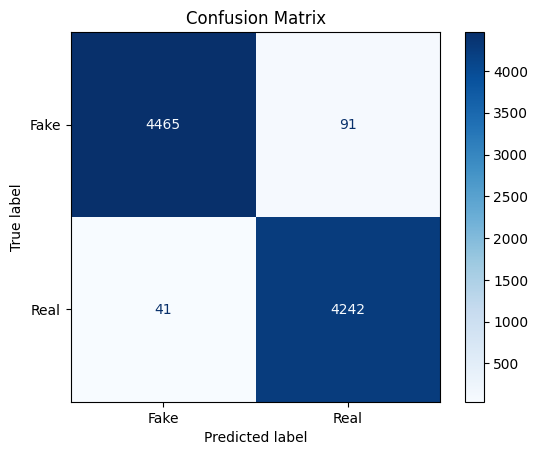

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [39]:
#Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Classification Report:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4556
        Real       0.98      0.99      0.98      4283

    accuracy                           0.99      8839
   macro avg       0.98      0.99      0.99      8839
weighted avg       0.99      0.99      0.99      8839



In [40]:
#ROC Curve and AUC
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
#Getting the probability scores (Required for ROC)
y_probs = model.predict_proba(X_test)[:,1]  #Probability of "Real" class

In [42]:
#Calculating the ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

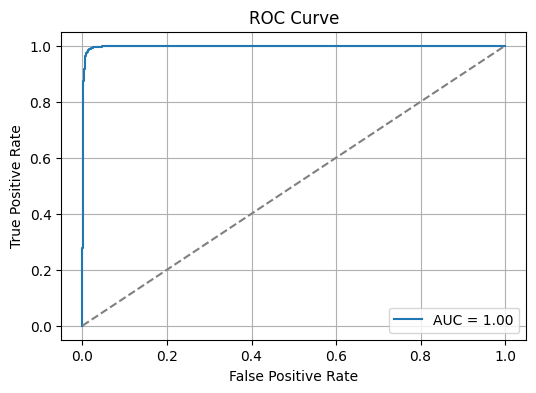

In [43]:
#Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
import joblib

In [45]:
#Example Prediction
sample_text = ["This is a secret government operation leaked online."]
sample_cleaned = [clean_text(sample_text[0])]
sample_vec = tfidf.transform(sample_cleaned)
prediction = model.predict(sample_vec)

In [46]:
print("Prediction: ", "REAL" if prediction[0] == 1 else "FAKE")

Prediction:  FAKE
